In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel,ttest_ind,poisson,binom

In [2]:
df=pd.read_csv(r"D:\Scaler projects\Delhivery business case\delhivery_data.csv")

In [3]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
#Removing null values
df=df.dropna(how="any")
df=df.reset_index(drop=True)

In [6]:
#converting columns into time date format
df["od_start_time"]=pd.to_datetime(df["od_start_time"])
df["od_end_time"]=pd.to_datetime(df["od_end_time"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [8]:
#unique column is created for unique  identification of trip id, source center and destination center
df["segment_key"]=df["trip_uuid"]+df["source_center"]+df["destination_center"]

df["segment_actual_time_sum"]=df.groupby("segment_key")["segment_actual_time"].cumsum()
df["segment_osrm_distance_sum"]=df.groupby("segment_key")["segment_osrm_distance"].cumsum()
df["segment_osrm_time_sum"]=df.groupby("segment_key")["segment_osrm_time"].cumsum()


In [9]:
segment_columns=["segment_actual_time","segment_osrm_distance","segment_osrm_time"]

In [10]:
df[(col+ "_sum" for col in segment_columns)]


,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [11]:
#creating segment to read data data speciallly actual time ,osrm_time with help of dictionary create_seg_dict

create_seg_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first', 
    'route_type' :'first',
    'trip_uuid':'first', 
    'source_center':'first',
    'source_name':'first', 
    
    'destination_center':'last',
    'destination_name':'last',
    
    'od_start_time':'first',
    'od_end_time':'first',
    'start_scan_to_end_scan':'first',
    
    
    'actual_distance_to_destination':'last', 
    'actual_time':'last',
    'osrm_time':'last',
    'osrm_distance':'last',
    
    'segment_actual_time_sum' :'last',
    'segment_osrm_time_sum':'last',
    'segment_osrm_distance':'last'
}

segment=df.groupby('segment_key').agg(create_seg_dict).reset_index()
segment=segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()
segment.columns

Index(['index', 'segment_key', 'data', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance'],
      dtype='object')

In [12]:
#convert od_time difference in hours

segment['od_time_diff_hour']=(segment['od_end_time']-segment['od_start_time']).dt.total_seconds()/60
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [13]:
#create trip dictionary


create_trip_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first', 
    'route_type' :'first',
    'trip_uuid':'first', 
    
    'source_center':'first',
    'source_name':'first', 
    
    'destination_center':'last',
    'destination_name':'last',
    
    'start_scan_to_end_scan':'sum',
    'od_time_diff_hour' :'sum',
    
    'actual_distance_to_destination':'sum', 
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    
    'segment_actual_time_sum' :'sum',
    'segment_osrm_time_sum':'sum',
    'segment_osrm_distance':'sum'
}

In [14]:
trip=segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)

In [15]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,20.4591
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,10.7538
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,77.6631
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,7.9091
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,51.1843


In [17]:
trip.shape

(14787, 18)

In [18]:
trip[["actual_time","segment_actual_time_sum"]]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0



# Hypothesis Testing:

In [30]:
#hypothesis testing on how actual time is different from segment time
#Ha: Actual and segment time are same
#Ho: Actual and segment time are different
np.mean(trip["actual_time"]),np.mean(trip["segment_actual_time_sum"])

(356.30601203760057, 353.0591735984311)

In [31]:
ttstat,p_value=ttest_ind(trip["actual_time"],trip["segment_actual_time_sum"])
p_value

0.6174479719707524

In [32]:
# let alpha=0.05
alpha=0.05
if p_value < alpha:
    print("Reject H0")
    print("Actual and segment time are same")
else:
    print("Fail to reject H0")
    print("actual time is different from segment time")
    

Fail to reject H0
actual time is different from segment time


In [51]:
#hypothesis testing on how actual distance is different from osrm_distance
#Ha: Actual and OSRM distance are same
#Ho: Actual and OSRM distance are different

trip[["actual_distance_to_destination","osrm_distance"]]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [34]:
np.mean(trip["actual_distance_to_destination"]),np.mean(trip["osrm_distance"])

(164.09019617205968, 203.88741124636502)

In [35]:
ttstat,p_value=ttest_ind(trip["actual_distance_to_destination"],trip["osrm_distance"])
p_value

7.65905658899532e-24

In [36]:
# let alpha=0.05
alpha=0.05
if p_value < alpha:
    print("Reject H0")
    print("Actual and OSRM distance are same") 
    
else:
    print("Fail to reject H0")
    print("Actual distance is different from segment distance") 

Reject H0
Actual and OSRM distance are same


In [52]:
#hypothesis testing on how actual time is different from osrm_time
#Ha: Actual and OSRM time are same
#Ho: Actual and OSRM time are different
trip[["actual_time","osrm_time"]]

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


In [37]:
np.mean(trip["actual_time"]),np.mean(trip["osrm_time"])

(356.30601203760057, 160.99093798606884)

In [38]:
ttstat,p_value=ttest_ind(trip["actual_time"],trip["osrm_time"])
p_value

8.2146191343447e-310

In [39]:
# let alpha=0.05
alpha=0.05
if p_value < alpha:
    print("Reject H0")
    print("Actual and OSRM distance are same") 
    
else:
    print("Fail to reject H0")
    print("Actual distance is different from segment distance") 

Reject H0
Actual and OSRM distance are same


### Insight: from above analysis it is clear that actual and osrm time are same.

In [53]:
#hypothesis testing between osrm time aggregated value and segment osrm time aggregated value
#Ha: segment osrm time and osrm time aggregated value are same
#Ho: segment osrm time and osrm time aggregated value are different
trip[["segment_actual_time_sum","segment_osrm_time_sum"]]

,segment_actual_time_sum,segment_osrm_time_sum
0,1548.0,1008.0
1,141.0,65.0
2,3308.0,1941.0
3,59.0,16.0
4,340.0,115.0
...,...,...
14782,82.0,62.0
14783,21.0,11.0
14784,281.0,88.0
14785,258.0,221.0


In [55]:
np.mean(trip["segment_actual_time_sum"]),np.mean(trip["segment_osrm_time_sum"])

(353.0591735984311, 180.5115980252925)

In [56]:
ttstat,p_value=ttest_ind(trip["segment_actual_time_sum"],trip["segment_osrm_time_sum"])
p_value

3.709448320622371e-232

In [57]:
# let alpha=0.05
alpha=0.05
if p_value < alpha:
    print("Reject H0")
    print("Actual and OSRM agrregated time are same") 
    
else:
    print("Fail to reject H0")
    print("Actual aggregated time is different from OSRM aggregated time") 

Reject H0
Actual and OSRM agrregated time are same


In [58]:
# from above analysis it is clear that Actual and OSRM aggregated time are same

In [59]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [61]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [62]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [63]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [64]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [65]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


In [73]:
#insights:

# busiest route
trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['source_city','destination_city'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

source_city  destination_city
bengaluru    bengaluru           718
bangalore    bengaluru           477
hyderabad    hyderabad           355
mumbai       mumbai              354
bengaluru    bangalore           344
                                ... 
kangayam     tirpur                1
kanhangad    mangalore             1
kankavali    pune                  1
kanpur       auraiya               1
kadiri       anantapur             1
Name: count, Length: 1711, dtype: int64

In [75]:
result.head(10)

source_city  destination_city
bengaluru    bengaluru           718
bangalore    bengaluru           477
hyderabad    hyderabad           355
mumbai       mumbai              354
bengaluru    bangalore           344
bhiwandi     mumbai              332
pune         pune                241
gurgaon      delhi               241
mumbai hub   mumbai              227
chennai      chennai             223
Name: count, dtype: int64

### Insight: these are the list of top ten busy  city routes
#most of these are common city except "Bhiwandi to Mumbai" and "Gurgaon to Delhi" and "Mumbai Hub to Mumbai"

In [76]:
#Most orders are coming from which state

trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['source_state'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

source_state
maharashtra               2714
karnataka                 2143
haryana                   1823
tamil nadu                1039
telangana                  784
uttar pradesh              760
gujarat                    750
delhi                      725
west bengal                665
punjab                     536
rajasthan                  514
andhra pradesh             435
bihar                      351
madhya pradesh             318
kerala                     289
assam                      268
jharkhand                  160
uttarakhand                114
orissa                     107
chandigarh                  93
goa                         65
chhattisgarh                43
himachal pradesh            34
jammu & kashmir             17
dadra and nagar haveli      15
pondicherry                 12
nagaland                     5
mizoram                      4
arunachal pradesh            4
Name: count, dtype: int64

### Insight: from above result it is clear that most orders are coming from Maharastra and least are coming from Arunanchal Pradesh

In [78]:
# from which city customers are placing most orders?

trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['destination_city'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

destination_city
bengaluru      1221
mumbai          968
gurgaon         877
delhi           554
bangalore       551
               ... 
dhekiajuli        1
dhemaji           1
dhone             1
dhrangadhra       1
parakkdavu        1
Name: count, Length: 839, dtype: int64

### Insight:  it is clear from above analysis that benguluru placed most orders then Mumbai and then Gurgaon

In [79]:
# from which state customers are placing most orders?
trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['destination_state'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

destination_state
maharashtra               2561
karnataka                 2294
haryana                   1640
tamil nadu                1084
uttar pradesh              805
telangana                  784
gujarat                    734
west bengal                697
delhi                      657
punjab                     617
rajasthan                  550
andhra pradesh             442
bihar                      367
madhya pradesh             350
kerala                     270
assam                      232
jharkhand                  181
uttarakhand                122
orissa                     119
chandigarh                  65
goa                         52
chhattisgarh                43
himachal pradesh            42
arunachal pradesh           25
jammu & kashmir             20
dadra and nagar haveli      17
meghalaya                    8
mizoram                      6
tripura                      1
daman & diu                  1
nagaland                     1
Name: count, dtype: i

### Insight: from above analysis that Maharastra placed most orders and least orders are placed from Tripura,Daman& Diu and Nagaland

# busiest day/month/week  Analysis

In [80]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [81]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [82]:
# in which month customers are placing most orders?
trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['trip_month'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

trip_month
9     13011
10     1776
Name: count, dtype: int64

# Insight:  only two months data is here and in 9th month orders are more as compare to 10th month

In [83]:
# in which week customers are placing most orders?
trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['trip_week'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

trip_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: int64

#Insight: busiest week is 38th week  and it is seen as the weeks are increasing orders are decreasing

In [84]:
# in which day customers are placing most orders?
trip['count'] =1       #initially, set that counter to 1.
group_data = trip.groupby(['trip_day'])['count'].sum() #sum function
result = group_data.sort_values(ascending=False)
result

trip_day
18    791
15    783
13    750
12    747
22    740
21    740
17    722
14    712
20    703
25    695
26    683
19    674
24    658
27    650
23    631
3     627
16    616
28    605
29    605
1     600
2     549
30    506
Name: count, dtype: int64

### Insight:  busiest day is 18th, 15th and 13th. and least orders are places in begining of the month 1 and 2 ns or at the end of the months 30 th

In [89]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

<AxesSubplot:>

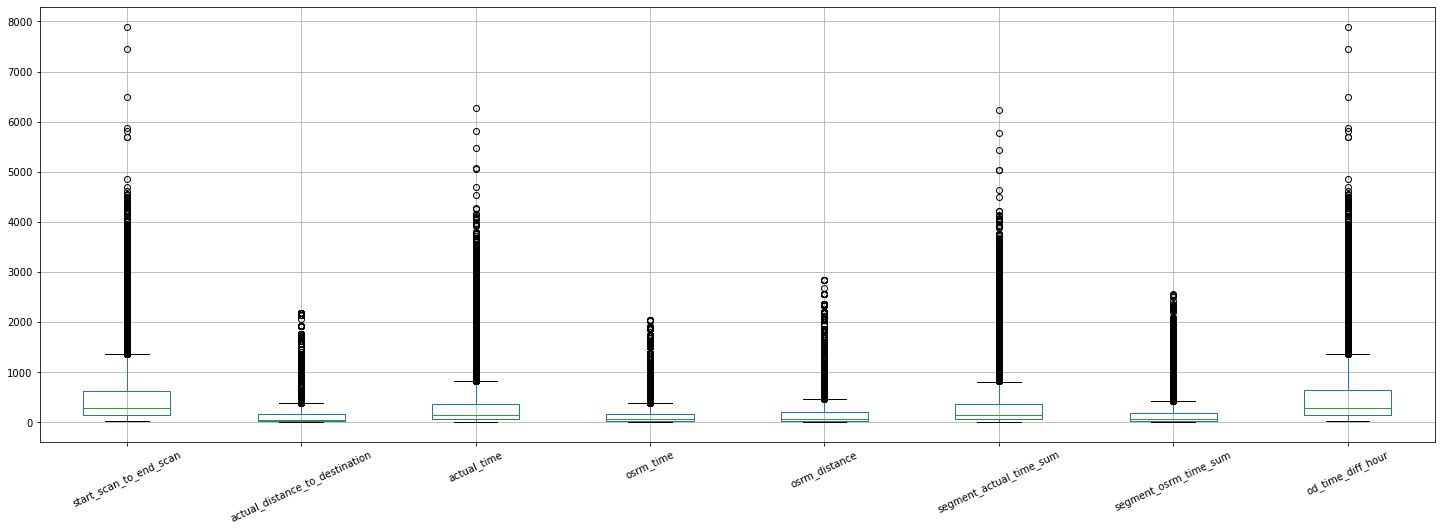

In [90]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [91]:
### Handle the outliers using IQR method

In [92]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [93]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)


In [94]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,source_place,source_code,count,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,doddablpur,chikadpp,d,1,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mumbai hub,mumbai,none,1,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,bellary,bellary,none,1,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,chennai,chennai,none,1,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,chennai,chrompet,dpc,1,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,chandigarh,mehmdpur,h,1,2018,10,23,3,40,2
12726,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,fbd,balabhgarh,dpc,1,2018,10,23,3,40,2
12727,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,kanpur,govndngr,dc,1,2018,10,23,3,40,2
12728,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tirunelveli,vdkkusrt,i,1,2018,10,23,3,40,2


<AxesSubplot:>

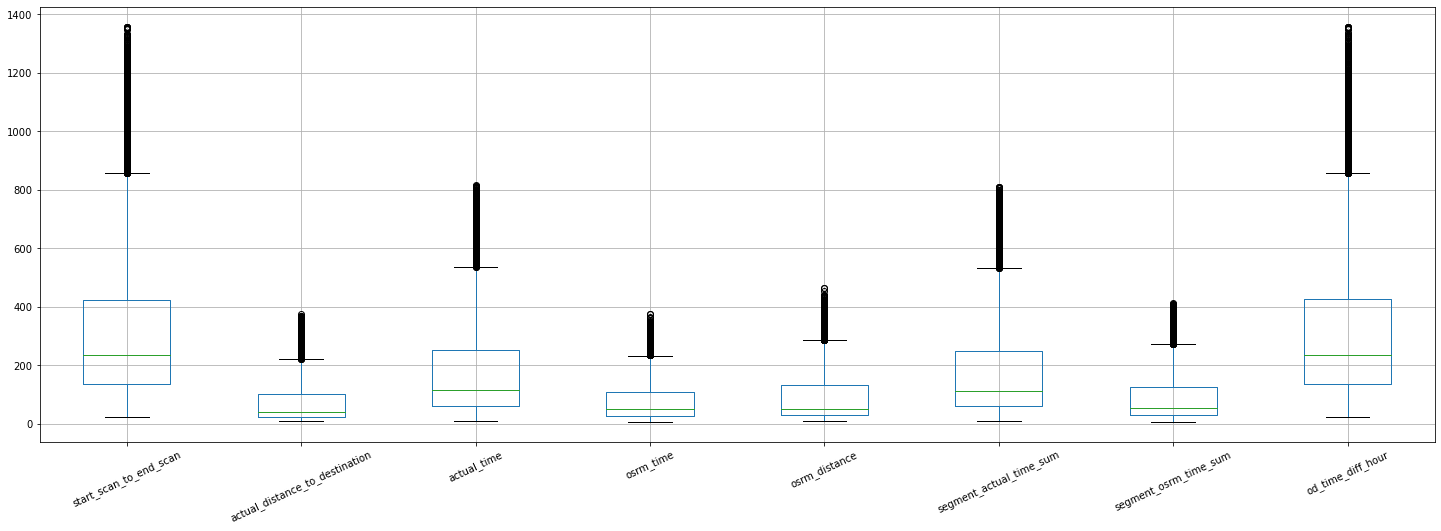

In [95]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

# Handling Categorical Variables

In [ ]:
Only two route_type – Do one hot encoding

In [96]:
trip['route_type'].value_counts()

Carting    8812
FTL        3918
Name: route_type, dtype: int64

In [97]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

### Normalization

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [100]:
trip[num_cols] = scaler.transform(trip[num_cols])
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.549116,0.009902,-0.219005,-0.145765,-0.075743,-0.222639,-0.263774,-0.545414
1,-0.861803,-0.764349,-0.748974,-0.876468,-0.803666,-0.743460,-0.877056,-0.862059
2,1.549792,0.759963,1.030208,0.529791,0.610459,1.041305,0.362024,1.549774
3,-0.513939,-0.661757,-0.736356,-0.766174,-0.710386,-0.737109,-0.789445,-0.510766
4,-0.869620,-0.875967,-0.969795,-0.904042,-0.888902,-0.965762,-0.914604,-0.871776
...,...,...,...,...,...,...,...,...
12725,-0.248156,-0.203312,-0.597554,-0.228486,-0.205327,-0.597376,-0.301322,-0.247115
12726,-1.018146,-0.787316,-0.988722,-0.917829,-0.843625,-0.984817,-0.939636,-1.017828
12727,0.392852,-0.467021,0.657968,-0.421502,-0.367300,0.666568,0.024093,0.393425
12728,0.103617,0.860530,0.544403,1.384577,0.881004,0.520484,1.688716,0.106095


In [ ]:
#Insights:
#from above analysis it is clear that OSRM analysis is quiet different from actual distance time and other parameter.
#busiest day is mid of the month
#we can provide some offers at the begining and end of the months to improve the transaction
#From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka.
#These 2 states need our immediate focus, especially during peak seasons.